![Los Angeles skyline](la_skyline.jpg)

Los Angeles, the vibrant City of Angels, is known for its sunny weather, iconic landmarks, and the bustling entertainment industry. However, like any metropolis, it grapples with the challenge of crime. In this project, we delve into the crime data of Los Angeles to uncover patterns and insights that can aid the Los Angeles Police Department (LAPD) in deploying resources effectively and addressing criminal activities across different areas. The dataset, sourced from Los Angeles Open Data, provides a detailed account of reported crimes, including information on dates, times, locations, and victim demographics. Let's navigate through the data to derive valuable insights and contribute to the ongoing efforts to enhance public safety.

## The Data

There's a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

Along this journey, the following questions will be answered:

* Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
* Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.
* Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

Below, the proper libraries are selected in addition to the creation of the DataFrame, where the columns "Date Rptd" and "DATE OCC" were to be identified as a datetime object.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


For the first question, Which hour has the highest frequency of crimes?, a column with the hour of each event was selected, then a histogram is displayed in order to gain insight about the distribution across a 24 hour period.

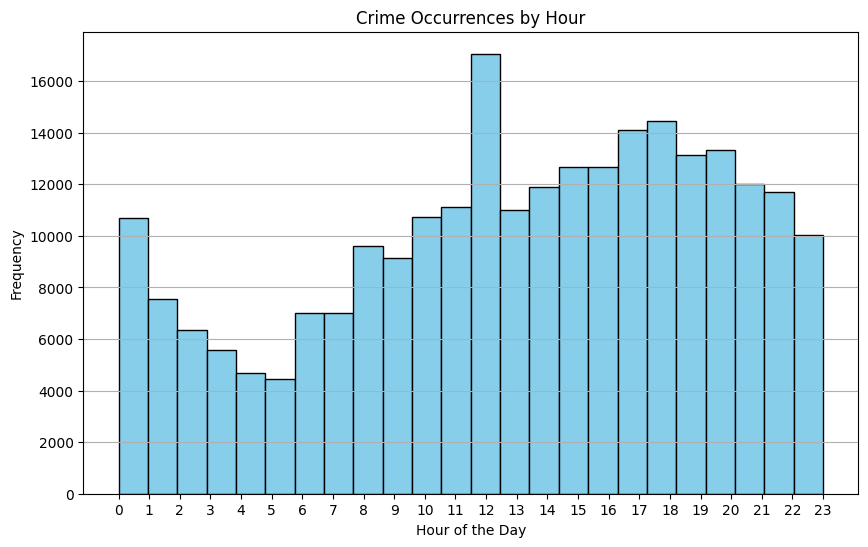

The hour with the highest frequency of crimes is: 12


In [2]:
# Extract the hour from the 'TIME OCC' column and find the peak crime hour
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M', errors='coerce')
crimes['hour'] = crimes['TIME OCC'].dt.hour
peak_crime_hour1 = crimes['hour'].value_counts().idxmax()
peak_crime_hour = int(peak_crime_hour1)

# Plot a histogram showing crime occurrences over time
plt.figure(figsize=(10, 6))
plt.hist(crimes['hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Crime Occurrences by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 24))
plt.grid(axis='y')
plt.show()

# Print the hour with the highest frequency of crimes
print(f"The hour with the highest frequency of crimes is: {peak_crime_hour1}")

The analysis of crime occurrence by hour reveals intriguing patterns. We find that noon is where the highest frequency of reported crimes. Understanding the temporal distribution of crimes is crucial for the LAPD to optimize patrol schedules and allocate resources during peak crime hours. This insight contributes to enhancing the strategic deployment of law enforcement personnel, ultimately fostering a safer environment for the residents of Los Angeles.

The area with the most amount of occurrences at night time is highlighted below. We consider night crimes those which occurred between 10 PM and 3:59 AM. Then, it is necessary to locate those crimes by discriminating them by location. A heatmap is provided in order to better grasp how crime depicts across the city.

The area with the largest frequency of night crimes is: Central


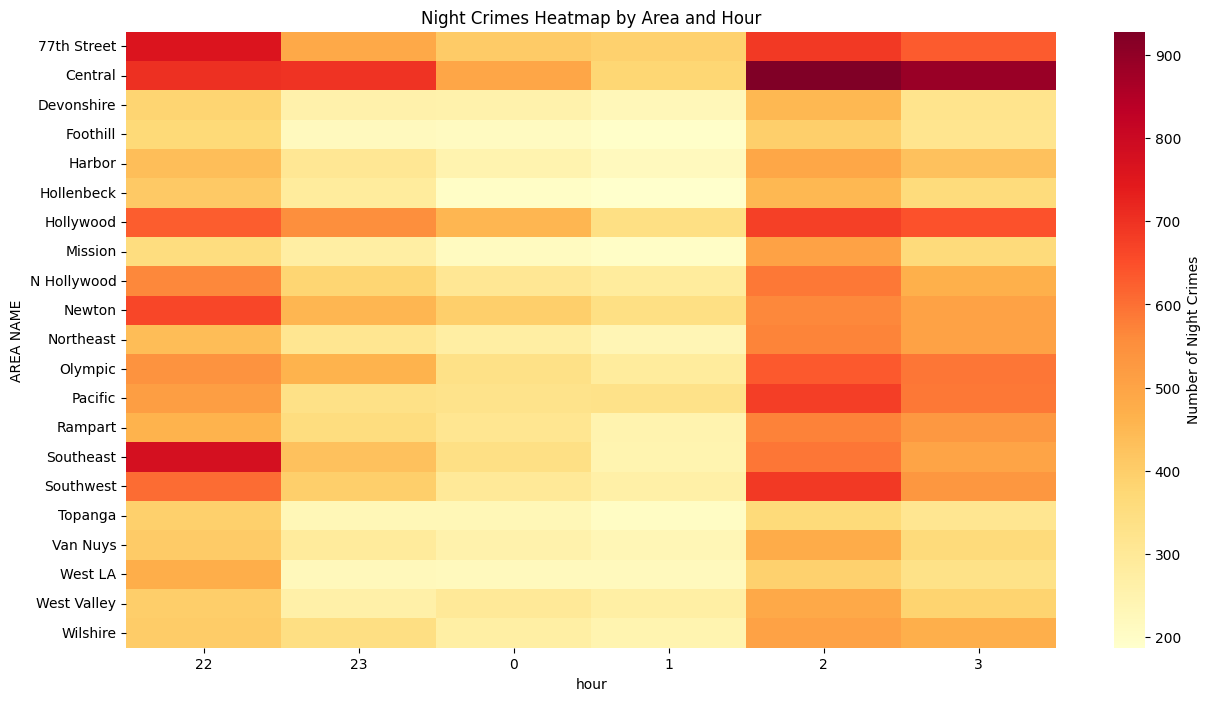

In [5]:
crimes['hour'] = crimes['TIME OCC'].dt.hour
crimes['night_crime'] = ((crimes['hour'] >= 22) | (crimes['hour'] <= 3))


# Filter for night crimes and find the area with the largest frequency
night_crimes = crimes[crimes['night_crime']]
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()

# Print the area with the largest frequency of night crimes
print(f"The area with the largest frequency of night crimes is: {peak_night_crime_location}")

# Create a pivot table with 'AREA NAME' and 'hour' columns
heatmap_data = night_crimes.pivot_table(index='AREA NAME', columns='hour', aggfunc='size', fill_value=0)

# Define the order of hours
hour_order = list(range(22, 24)) + list(range(0, 4))

# Create a heatmap with specified order
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Number of Night Crimes'}, xticklabels=hour_order)
plt.title('Night Crimes Heatmap by Area and Hour')
plt.show()

Night crimes pose a unique challenge for law enforcement, and identifying areas with a higher frequency of such incidents is pivotal. Our analysis highlights Central as the area where night crimes are most prevalent. It makes sense due to the charachteristics of this area, mostly having movement during office hours. This information aids the LAPD in tailoring its strategies to address nighttime criminal activities effectively. By focusing resources in these specific areas during night hours, the police department can take proactive measures to deter crime and ensure the safety of the community during vulnerable times.

Certain groups of age may be vulnerable to crime more than others. Considering that demographics are always available to the different districts forming the LAPD, certain strategies can go along to help the community.

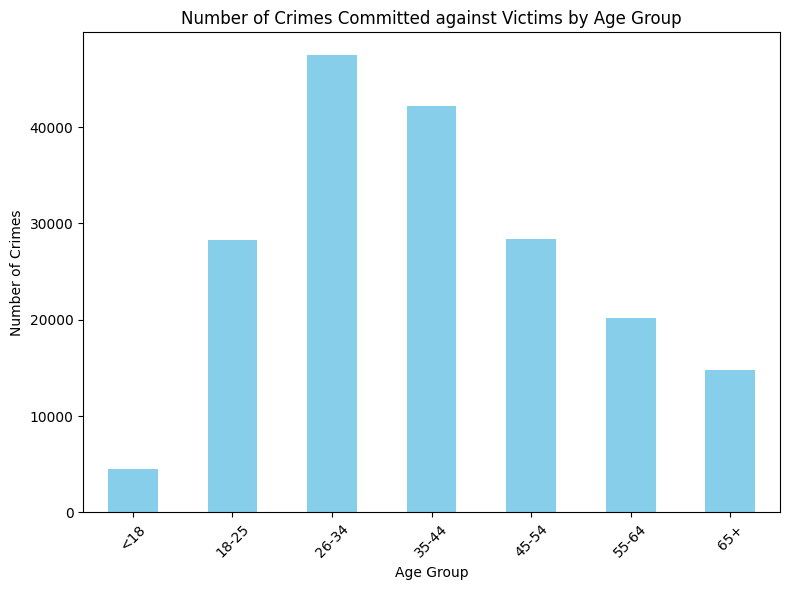

Number of crimes committed against victims by age group:
Victim Age Group
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
<18       4528
Name: count, dtype: int64


In [6]:
# Assuming the column 'Victim Age' contains the age of the victims, categorize them into age groups
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]  # Define the age group bins
age_labels = ['<18', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']  # Labels for age groups

# Categorize victim ages into age groups
crimes['Victim Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

# Count the number of crimes per age group
victim_ages = crimes['Victim Age Group'].value_counts()

# Plotting the number of crimes per age group
plt.figure(figsize=(8, 6))
victim_ages.sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Committed against Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the series of number of crimes per age group
print("Number of crimes committed against victims by age group:")
print(victim_ages)

Understanding the age demographics of crime victims is essential for targeted interventions. The analysis categorizes victims into age groups (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+), revealing the distribution of crimes across different age segments. This segmentation provides valuable insights for developing age-specific crime prevention programs and support services. The group pertaining people between 26 and 34 years old was the one reporting the most amount of occurrences. This can aid in crafting policies that address the unique challenges faced by victims in various age groups, contributing to a more nuanced and effective approach in ensuring public safety.